# Gambler's Problem

Game: coin flip

Reward: wins as many dollars as he has staked

The game ends when the gambler reaches 100$ or he loses everything.

Value Iteration algorithm will be used in this problem to obtain the optimal policy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def value_iteration(theta, states, v, reward, prob, policy, gamma):
    i = 0
    while True:
        delta = []
        i +=1
        for s in states[1:]:
            old = v[s]
            v, a = max_action(s,prob, reward, v, gamma)
            tmp = abs(old-v[s])
            delta.append(tmp)
            policy[s] = a
        if np.all(delta < theta) or i >1000:
            plt.plot(delta)
            plt.show
            return policy, v

In [9]:
def max_action(s, p, r, v, gamma):
    max_v = 0
    action = 0
    for i in range(0,min(s,100-s)+1):
        update = p * (r[s+i] + gamma * v[s+i]) + (1 - p) * (r[s-i] + gamma * v[s-i])
        if update >= max_v:
            max_v = update
            v[s] = update
            action = i
    return v, action

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 16. 35.
 36. 37. 38. 39. 40. 41. 42.  7. 44. 45. 46. 47.  2. 49. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


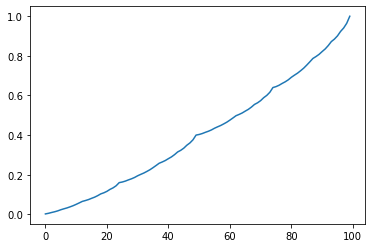

In [12]:
#variables
theta = np.repeat(0.1, 100)
states = list(range(101))
v = np.zeros(101)
reward = np.zeros(len(states))
reward[100] = 1
policy = np.zeros(101)
p , v= value_iteration(theta, states, v, reward, 0.4, policy, 1)
print(p)

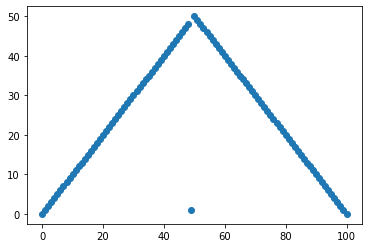

In [8]:
plt.plot(p, 'o')
plt.show()

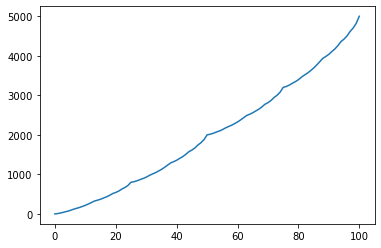

In [10]:
plt.plot(v)
plt.show()